# Portfolio Optimization of American stocks 

The main idea of this project is to understand modern portfolio theory and optimize the portfolio using scipy optimizer 

**Importing Pandas DataReader to get stocks data.**

In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,1,1)

After research, I selected four stocks from the US nasdaq market. 

In [3]:
msft = web.DataReader('MSFT','yahoo',start,end)
google = web.DataReader('GOOGL','yahoo',start,end)
tesla = web.DataReader('TSLA','yahoo',start,end)
amzn = web.DataReader('AMZN','yahoo',start,end)

In [4]:
stocks = pd.concat([msft['Close'],google['Close'],tesla['Close'],amzn['Close']], axis=1)
stocks.columns = ['MICROSOFT','GOOGLE','TESLA','AMAZON']
stocks

,MICROSOFT,GOOGLE,TESLA,AMAZON
Date,,,,
2019-12-31,157.699997,66.969498,27.888666,92.391998
2020-01-02,160.619995,68.433998,28.684000,94.900497
2020-01-03,158.619995,68.075996,29.534000,93.748497
2020-01-06,159.029999,69.890503,30.102667,95.143997
2020-01-07,157.580002,69.755501,31.270666,95.343002
...,...,...,...,...
2020-12-24,222.750000,86.708000,220.589996,158.634506
2020-12-28,224.960007,88.697998,221.229996,164.197998
2020-12-29,224.149994,87.888000,221.996674,166.100006


**Finding Returns of the stocks. we also need Log Returns because the prices of the stocks are in different range.**

In [5]:
cov_matrix = stocks.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,MICROSOFT,GOOGLE,TESLA,AMAZON
MICROSOFT,0.000768,0.000581,0.000818,0.000497
GOOGLE,0.000581,0.000591,0.000636,0.000400
TESLA,0.000818,0.000636,0.003180,0.000641
AMAZON,0.000497,0.000400,0.000641,0.000586


In [6]:
e_r = stocks.resample('Y').last().pct_change().mean()
e_r

MICROSOFT    0.410400
GOOGLE       0.308536
TESLA        7.434370
AMAZON       0.762561
dtype: float64

In [7]:
sd = stocks.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sd

MICROSOFT    0.438234
GOOGLE       0.384488
TESLA        0.891612
AMAZON       0.382623
dtype: float64

In [8]:
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MICROSOFT,0.410400,0.438234
GOOGLE,0.308536,0.384488
TESLA,7.434370,0.891612
AMAZON,0.762561,0.382623


In [33]:
p_ret = []
p_vol = []
p_weights = []
sharpe_ratio = []

num_assets = len(stocks.columns)
num_portfolios = 1000

In [34]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(250)
    p_vol.append(ann_sd)
    SR = returns / ann_sd
    sharpe_ratio.append(SR)

In [45]:
data = {'Returns':p_ret, 'Volatility':p_vol,'Sharpe_Ratio':sharpe_ratio}

In [46]:
for counter, symbol in enumerate(stocks.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [47]:
portfolios = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,Sharpe_Ratio,MICROSOFT weight,GOOGLE weight,TESLA weight,AMAZON weight
0,2.332282,0.438389,5.320124,0.203452,0.182193,0.258414,0.355942
1,2.666058,0.497900,5.354604,0.535057,0.135543,0.322771,0.006629
2,3.791316,0.553377,6.851234,0.253903,0.030249,0.469424,0.246424
3,2.306029,0.459450,5.019108,0.270823,0.451999,0.276396,0.000783
4,3.474989,0.518283,6.704811,0.141282,0.090939,0.420196,0.347582


In [60]:
portfolios[portfolios['Sharpe_Ratio']==portfolios['Sharpe_Ratio'].max()]

,Returns,Volatility,Sharpe_Ratio,MICROSOFT weight,GOOGLE weight,TESLA weight,AMAZON weight
489,6.365456,0.780427,8.156373,0.004648,0.016525,0.841156,0.137671


In [61]:
max_SR_port = portfolios.iloc[portfolios['Sharpe_Ratio'].idxmax()]
max_SR_port

Returns             6.365456
Volatility          0.780427
Sharpe_Ratio        8.156373
MICROSOFT weight    0.004648
GOOGLE weight       0.016525
TESLA weight        0.841156
AMAZON weight       0.137671
Name: 489, dtype: float64

<Figure size 864x864 with 0 Axes>

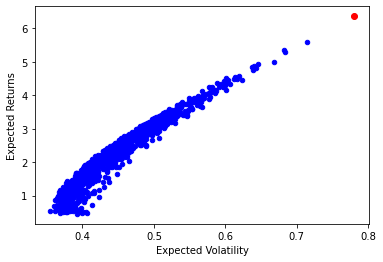

In [68]:
plt.figure(figsize=(12,12))
portfolios.plot.scatter(x='Volatility', y='Returns',c='blue')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.scatter(max_SR_port[1], max_SR_port[0], color='red')
plt.show()

# Global Minimum Variance Portfolio

In [58]:
portfolios[portfolios['Volatility']==portfolios['Volatility'].min()]

,Returns,Volatility,Sharpe_Ratio,MICROSOFT weight,GOOGLE weight,TESLA weight,AMAZON weight
726,0.550886,0.354198,1.555303,0.043769,0.523177,0.006186,0.426868


In [59]:
min_var_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_var_port

Returns             0.550886
Volatility          0.354198
Sharpe_Ratio        1.555303
MICROSOFT weight    0.043769
GOOGLE weight       0.523177
TESLA weight        0.006186
AMAZON weight       0.426868
Name: 726, dtype: float64

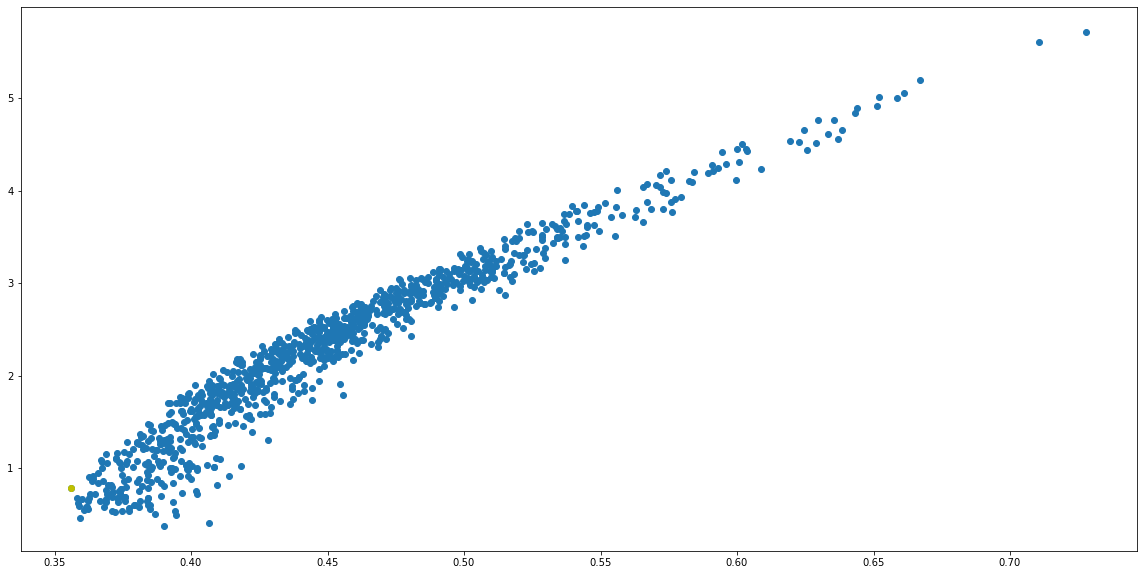

In [17]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='y')

# Optimal Risky Portfolio

$$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$

In [69]:
rf = 0.025

In [70]:
((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()

489

In [71]:
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns             6.365456
Volatility          0.780427
Sharpe_Ratio        8.156373
MICROSOFT weight    0.004648
GOOGLE weight       0.016525
TESLA weight        0.841156
AMAZON weight       0.137671
Name: 489, dtype: float64

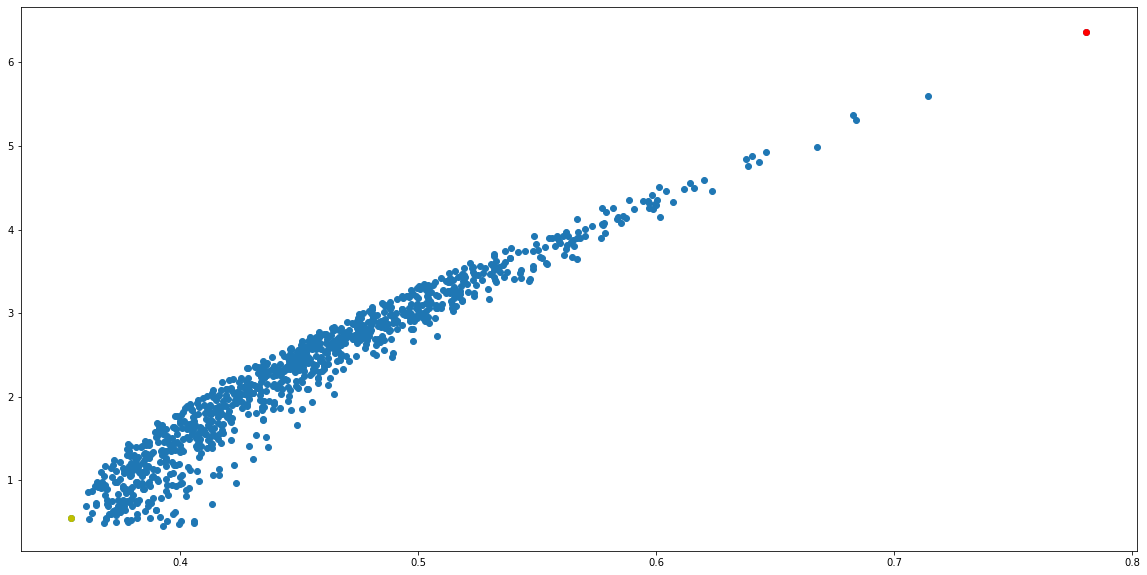

In [73]:
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='y')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='red')

# Utility Function

$$U = E(R)-0.5A\sigma^2$$

# Capital Allocation Line

$$E(R_P) = rf + \frac{E(R_i)-rf}{\sigma_i}\sigma_p$$

In [74]:
cal_x = []
cal_y = []
utility = []
a = 10

In [75]:
for er in np.linspace(rf, max(p_ret), 20):
    sd = (er - rf)/((optimal_risky_port[0]-rf)/optimal_risky_port[1])
    u = er - .5*a*(sd**2)
    cal_x.append(sd)
    cal_y.append(er)
    utility.append(u)

In [76]:
data2 = {'utility':utility, 'cal_y':cal_y, 'cal_x':cal_x}
cal = pd.DataFrame(data2)
cal.head()

,utility,cal_y,cal_x
0,0.025000,0.025000,0.000000
1,0.350272,0.358708,0.041075
2,0.658673,0.692416,0.082150
3,0.950202,1.026125,0.123225
4,1.224860,1.359833,0.164300


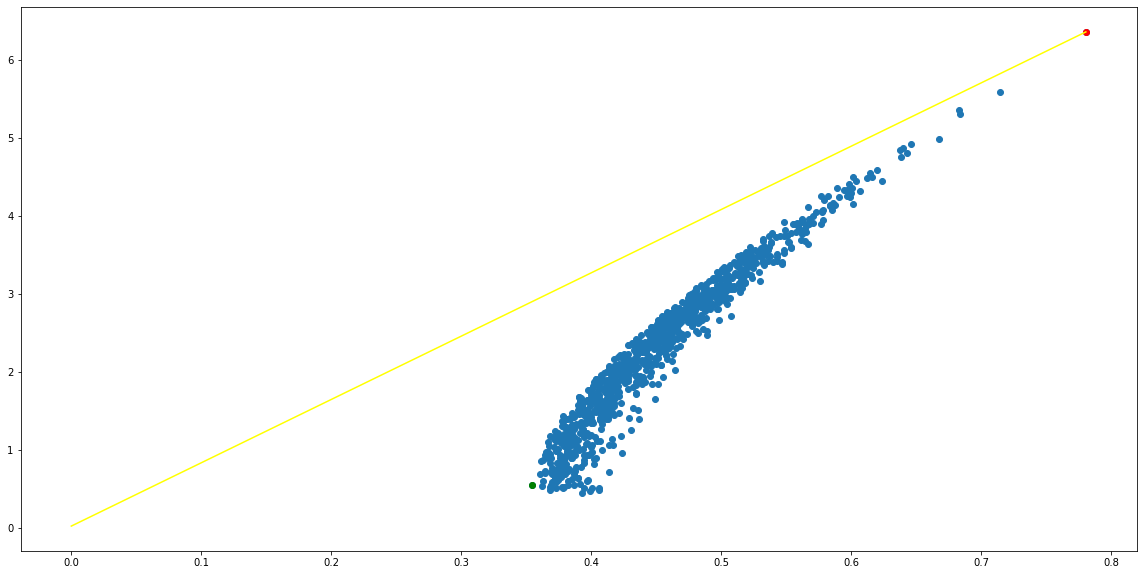

In [80]:
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='g')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='red')
plt.plot(cal_x, cal_y, color='yellow')

In [81]:
cal['utility'].idxmax()

19

In [82]:
investors_port = cal.iloc[cal['utility'].idxmax()]
investors_port

utility    3.320122
cal_y      6.365456
cal_x      0.780427
Name: 19, dtype: float64

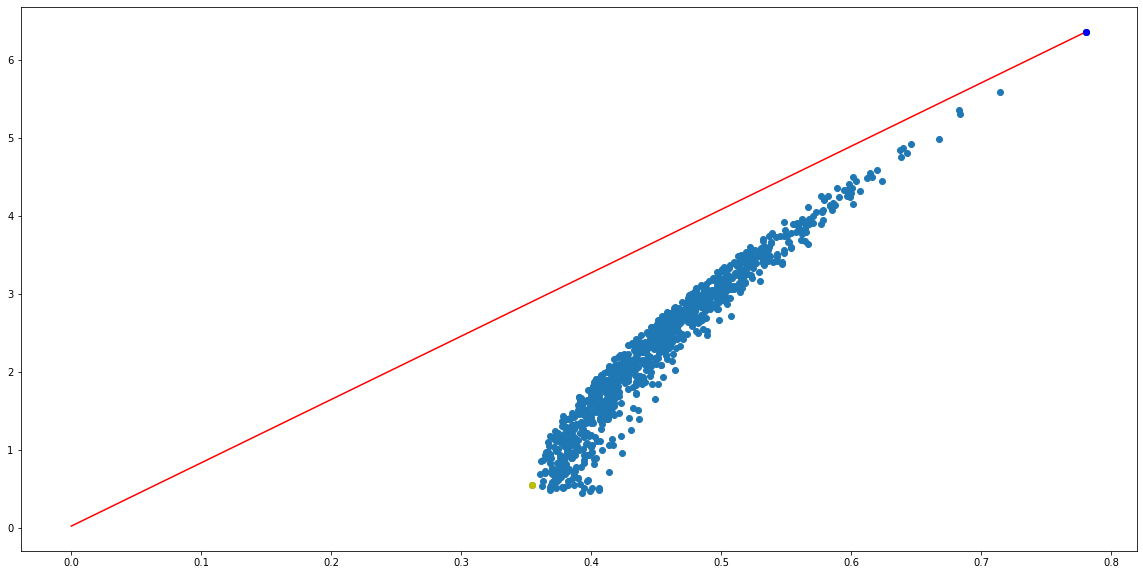

In [83]:
plt.subplots(figsize=(20,10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'])
plt.scatter(min_var_port[1], min_var_port[0], color='y')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g')
plt.plot(cal_x, cal_y, color='r')
plt.plot(investors_port[2], investors_port[1], 'o', color='b')